In [0]:
import warnings
warnings.simplefilter("ignore")

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Decision Trees

In [0]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth = 2)

max_depth = profundidad del arbol

In [0]:
from sklearn.model_selection import train_test_split

X = pd.read_csv("X.csv")
y = X['NUM_GRAVEDAD']
X = X.drop('NUM_GRAVEDAD',axis=1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [6]:
model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
import graphviz 

libreria para visualizar grafos

In [0]:
from sklearn.tree import export_graphviz

treedot = export_graphviz(model,
                         out_file =None,
                          feature_names=X.columns
                         )

In [9]:
treedot

'digraph Tree {\nnode [shape=box] ;\n0 [label="NUM_CLASE <= 1.5\\nmse = 0.256\\nsamples = 26604\\nvalue = 1.477"] ;\n1 [label="NUM_DISENO <= 1.5\\nmse = 0.224\\nsamples = 18535\\nvalue = 1.677"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="mse = 0.209\\nsamples = 12002\\nvalue = 1.717"] ;\n1 -> 2 ;\n3 [label="mse = 0.244\\nsamples = 6533\\nvalue = 1.603"] ;\n1 -> 3 ;\n4 [label="NUM_DISENO <= 2.5\\nmse = 0.027\\nsamples = 8069\\nvalue = 1.017"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n5 [label="mse = 0.043\\nsamples = 4861\\nvalue = 1.026"] ;\n4 -> 5 ;\n6 [label="mse = 0.002\\nsamples = 3208\\nvalue = 1.002"] ;\n4 -> 6 ;\n}'

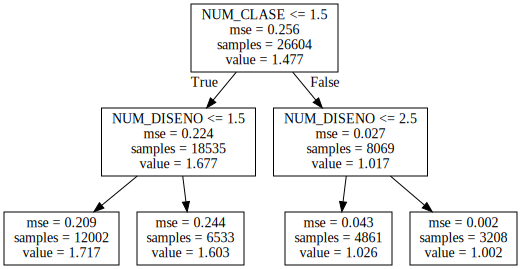

In [11]:
graphviz.Source(treedot)

nuestra mejor variable de predicion fue NUM_CLASE

# Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

forest = RandomForestRegressor(200)
results = cross_validate(forest,X,y,cv=5,scoring='r2',return_train_score=True)

In [13]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.9126062035376062
0.36434070270641516


Mejor resultado que Lasso! Y ano tenemos Bias y tenemos un mejor score r2. Sin embargo tenemos una diferencia importante entre score de entrenamiento y test(overfit)

# Gradient Boosted Trees

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

ensemble = GradientBoostingRegressor()
results = cross_validate(forest,X,y,cv=5,scoring='r2',return_train_score=True)

In [0]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.8716282694263648
0.06892558136267857


# Optimización de hiperparámetros

Buenas practicas del Gradient Boosted Trees, siguiendo el modelo

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [0]:
from sklearn.model_selection import GridSearchCV

param_test1 = {'n_estimators':range(20,501,20)}

In [16]:
list(param_test1['n_estimators'])

[20,
 40,
 60,
 80,
 100,
 120,
 140,
 160,
 180,
 200,
 220,
 240,
 260,
 280,
 300,
 320,
 340,
 360,
 380,
 400,
 420,
 440,
 460,
 480,
 500]

se hace por que con GridSearch se busca el mejor valor para la cantidad de estimadores 

In [0]:
estimador = GradientBoostingRegressor(learning_rate =0.1,
                                     min_samples_split=500,
                                     min_samples_leaf=500,
                                     max_depth=8,
                                     max_features='sqrt',
                                     subsample=0.8,
                                     random_state=10)

parametros de los arboles

In [0]:
gsearch1 = GridSearchCV(estimador,
                       param_grid = param_test1,
                       scoring='r2',
                       cv=5)

In [23]:
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=8,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=500,
                                                 min_samples_split=500,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
           

In [24]:
list(zip(gsearch1.cv_results_['mean_test_score'], gsearch1.cv_results_['std_test_score'], gsearch1.cv_results_['params']))

[(0.36968743277442534, 0.007705709501499276, {'n_estimators': 20}),
 (0.3851857584255656, 0.008222161062052296, {'n_estimators': 40}),
 (0.3864410382621378, 0.008271093485793801, {'n_estimators': 60}),
 (0.38687880724806795, 0.00840105732428415, {'n_estimators': 80}),
 (0.3873483441575848, 0.008622406120776771, {'n_estimators': 100}),
 (0.3874415315461497, 0.008738657351306755, {'n_estimators': 120}),
 (0.3877867779956958, 0.00909164375862956, {'n_estimators': 140}),
 (0.38775366386620946, 0.009345975737555585, {'n_estimators': 160}),
 (0.38768478493637876, 0.009430017645203301, {'n_estimators': 180}),
 (0.38776665190557963, 0.009476946345380587, {'n_estimators': 200}),
 (0.387827056922491, 0.010026808114123462, {'n_estimators': 220}),
 (0.38772009061879426, 0.010629214670240304, {'n_estimators': 240}),
 (0.38786198828941004, 0.010653215277977867, {'n_estimators': 260}),
 (0.38735548920323465, 0.010760255464691499, {'n_estimators': 280}),
 (0.3873287247066461, 0.011020436501457611, {'n

 mejoramos nuestro performarce 0.8



In [0]:
final_results = cross_validate(gsearch1.best_estimator_,X_train,y_train)

In [26]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.9125789738365
0.3644431893556015


In [0]:
estimador = GradientBoostingRegressor(learning_rate =0.1,
                                     min_samples_split=500,
                                     min_samples_leaf=500,
                                     max_depth=8,
                                     max_features='sqrt',
                                     subsample=0.8,
                                     random_state=10,
                                     n_estimators=240)

In [28]:
estimador.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=8,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=500, min_samples_split=500,
                          min_weight_fraction_leaf=0.0, n_estimators=240,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=10, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [29]:
estimador.score(X_test, y_test)

0.38519620992253256

Conclusion final

en Score r2 gracias al haber trabajado sobre las features y tomar varios modelos y finalmente con gsearch1 al haber optimizado los parametros de nuestro modelo